In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

% matplotlib inline

In [2]:
training = pd.read_csv('Insight_Train_DC.csv')

# Exploratory data analysis

In [3]:
training.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Min         float64
Max         float64
Nmax        float64
Nzeros      float64
Mode        float64
Mean        float64
Median      float64
Variance    float64
Tendency    float64
NSP         float64
dtype: object

In [4]:
training.describe()

/usr/lib/python2.7/dist-packages/pandas/compat/scipy.py:68: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  score = values[idx]
/usr/lib/python2.7/dist-packages/pandas/compat/scipy.py:68: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  score = values[idx]
/usr/lib/python2.7/dist-packages/pandas/compat/scipy.py:68: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  score = values[idx]
/usr/lib/python2.7/dist-packages/pandas/compat/scipy.py:68: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  score = values[idx]
/usr/lib/python2.7/dist-packages/pandas/compat/scipy.py:68: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  score = values[idx]
/usr/lib/python2.7/dist-packages/pandas/compat/scipy.py

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,
count,1699.000000,1699.000000,1700.000000,1700.000000,1701.000000,1701.000000,1701.000000,1700.000000,1700.000000,1700.000000,1700.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,...
mean,132.723367,0.003418,0.007615,0.004839,0.002139,0.000005,0.000186,46.060588,1.383059,7.758235,7.867353,70.568570,93.282519,163.851089,4.050029,0.333726,136.756327,133.562095,137.411418,20.355503,...
std,9.336782,0.003966,0.043627,0.002800,0.003091,0.000068,0.000644,16.903471,0.810530,16.020140,5.610039,37.104719,28.228439,17.258809,2.846355,0.682862,16.724137,15.917895,14.685702,29.120311,...
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,...
25%,126.000000,0.000000,0.000000,0.003000,0.000000,0.000000,0.000000,31.000000,0.800000,0.000000,4.300000,39.000000,68.000000,153.000000,2.000000,0.000000,129.000000,124.000000,128.000000,3.000000,...
50%,133.000000,0.002000,0.000000,0.005000,0.000000,0.000000,0.000000,47.000000,1.300000,0.000000,7.200000,67.000000,94.000000,162.000000,4.000000,0.000000,139.000000,135.000000,139.000000,9.000000,...
75%,139.000000,0.006000,0.002000,0.007000,0.004000,0.000000,0.000000,60.000000,1.800000,7.000000,10.400000,99.000000,118.000000,174.000000,6.000000,0.000000,148.000000,145.000000,147.000000,26.000000,...
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,50.700000,180.000000,158.000000,238.000000,18.000000,8.000000,186.000000,182.000000,186.000000,269.000000,...


In [5]:
training.NSP.value_counts()

1    1408
2     154
3     137
dtype: int64

In [6]:
training.NSP.describe()

count    1699.000000
mean        1.251913
std         0.591549
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: NSP, dtype: float64

In [7]:
training.shape

(1702, 22)

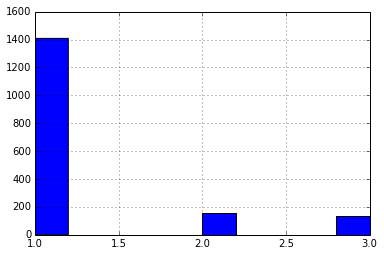

In [8]:
training.NSP.hist();

In [9]:
features = training.columns
print features

Index([u'LB', u'AC', u'FM', u'UC', u'DL', u'DS', u'DP', u'ASTV', u'MSTV', u'ALTV', u'MLTV', u'Width', u'Min', u'Max', u'Nmax', u'Nzeros', u'Mode', u'Mean', u'Median', u'Variance', u'Tendency', u'NSP'], dtype='object')


In [10]:
features = [u'LB', u'AC', u'FM', u'UC', u'DL', u'DS', u'DP', u'ASTV', u'MSTV', u'ALTV', u'MLTV', u'Width', u'Min', 
            u'Max', u'Nmax', u'Nzeros', u'Mode', u'Mean', u'Median', u'Variance', u'Tendency']

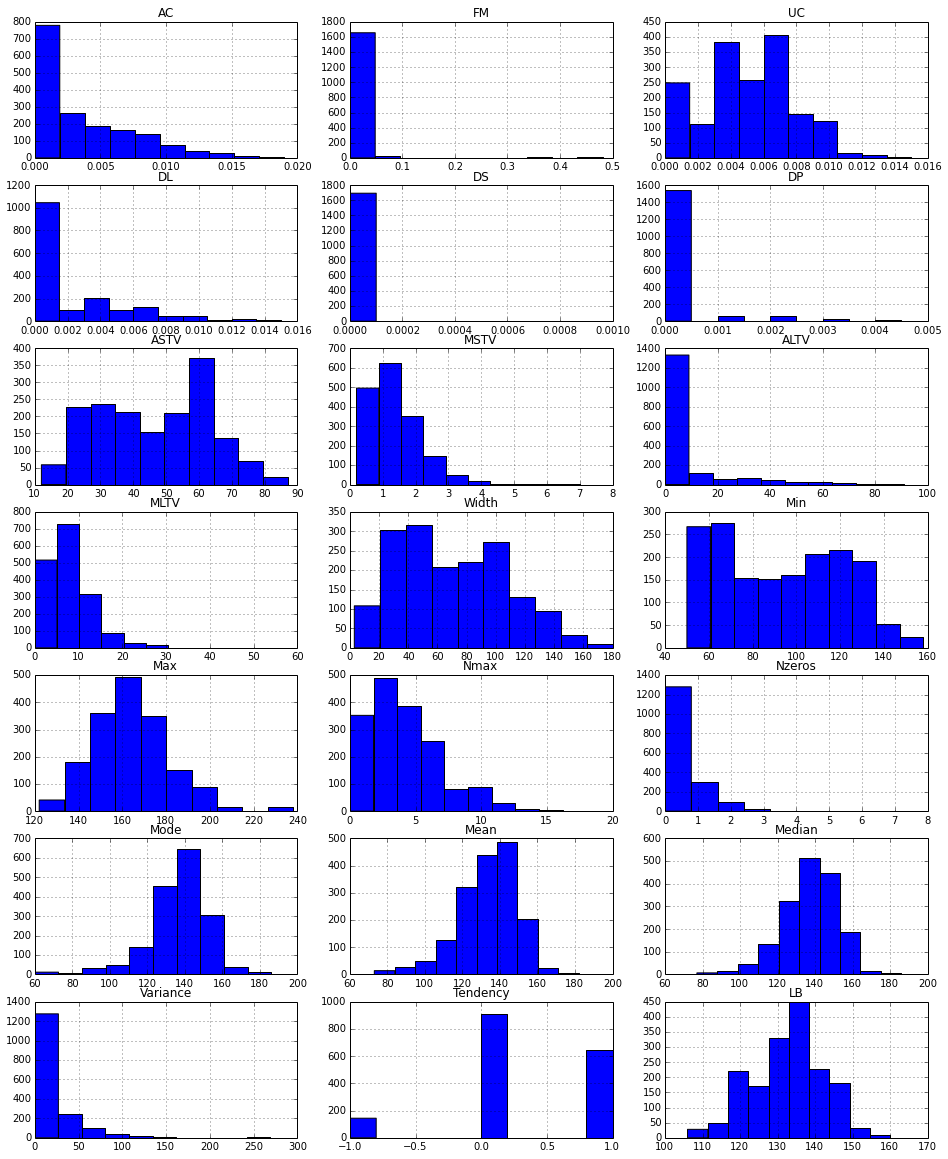

In [14]:
plt.figure(figsize=[16,20])
for i,col in enumerate(features):
    plt.subplot(7,3,i);
    training[col].hist();
    plt.title(col);

In [15]:
for col in ['Tendency','DS','DP','Nzeros','NSP']:
    print col, np.unique(training[col])

Tendency [ -1.   0.   1.  nan  nan  nan]
DS [ 0.     0.001    nan]
DP [ 0.     0.001  0.002  0.003  0.004  0.005    nan]
Nzeros [  0.   1.   2.   3.   5.   7.   8.  nan  nan  nan]
NSP [  1.   2.   3.  nan  nan  nan]


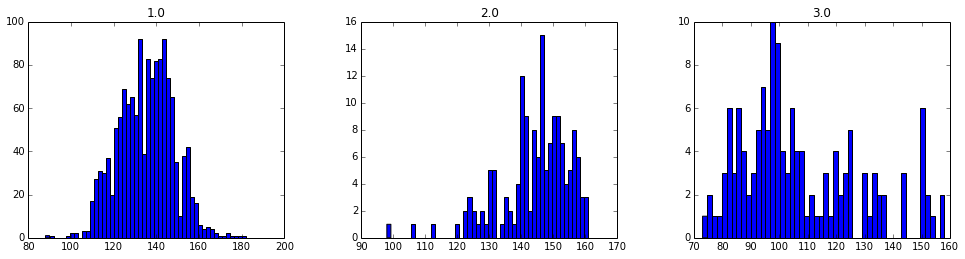

In [11]:
training.Mean.hist(by=training.NSP, layout=(1,3), figsize=[16,4]);

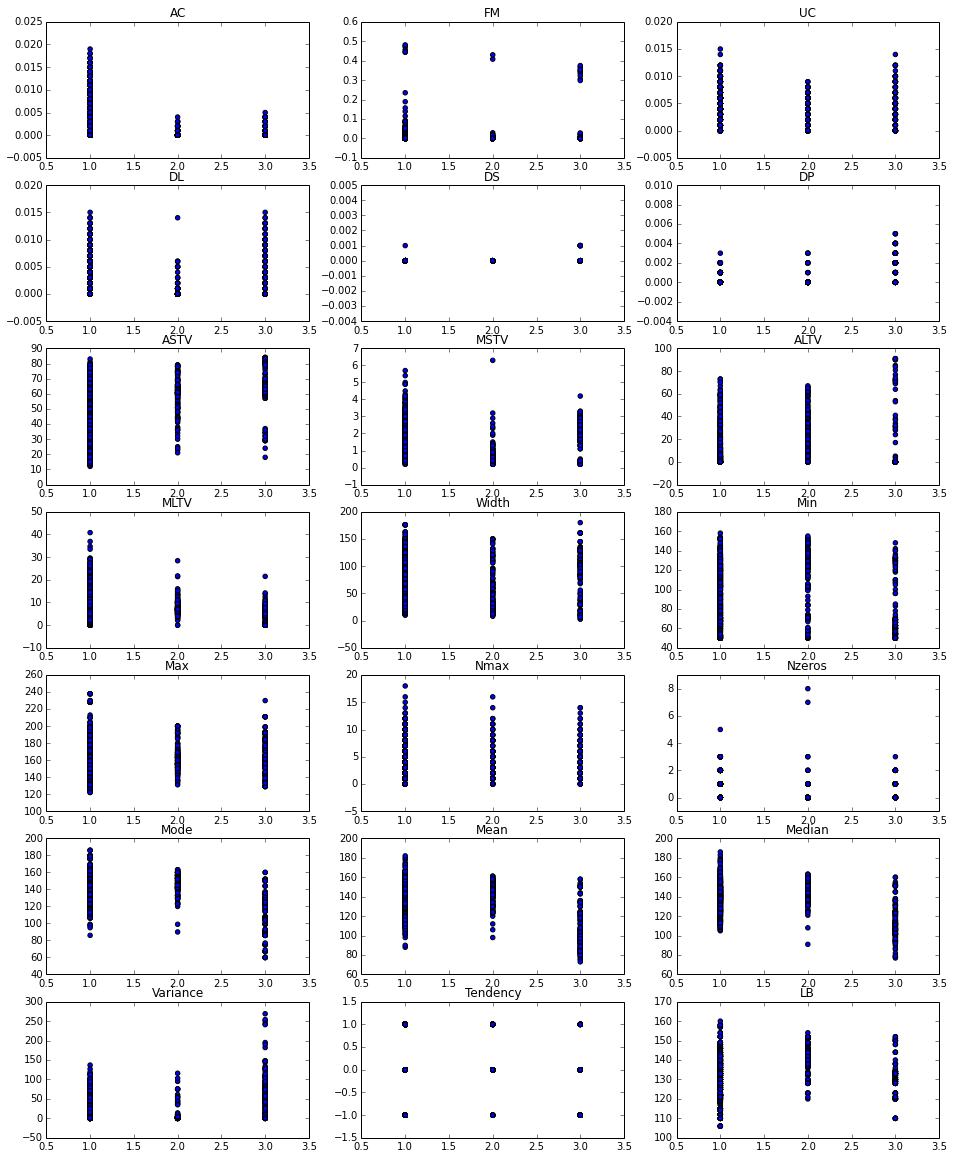

In [17]:
plt.figure(figsize=[16,20])
for i,col in enumerate(features):
    plt.subplot(7,3,i);
    plt.scatter(training.NSP, training[col]);
    plt.title(col);

In [26]:
training.isnull().sum()

LB          3
AC          3
FM          2
UC          2
DL          1
DS          1
DP          1
ASTV        2
MSTV        2
ALTV        2
MLTV        2
Width       3
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
NSP         3
dtype: int64

In [28]:
training[training.LB.isnull()]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,
1699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...
1700,NaN,NaN,NaN,NaN,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...
1701,NaN,NaN,0.481,0.015,0.015,0.001,0.005,87,7,91,50.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...


In [13]:
all_present = training.dropna()
# alt option: all_present = training.fillna(0)

In [14]:
all_present.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,
count,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,...
mean,132.723367,0.003418,0.007336,0.004833,0.002132,0.000004,0.000184,46.036492,1.379753,7.709241,7.842142,70.568570,93.282519,163.851089,4.050029,0.333726,136.756327,133.562095,137.411418,20.355503,...
std,9.336782,0.003966,0.042100,0.002790,0.003076,0.000064,0.000634,16.879217,0.799221,15.896944,5.514523,37.104719,28.228439,17.258809,2.846355,0.682862,16.724137,15.917895,14.685702,29.120311,...
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,...
25%,126.000000,0.000000,0.000000,0.003000,0.000000,0.000000,0.000000,31.000000,0.800000,0.000000,4.300000,39.000000,68.000000,153.000000,2.000000,0.000000,129.000000,124.000000,128.000000,3.000000,...
50%,133.000000,0.002000,0.000000,0.005000,0.000000,0.000000,0.000000,47.000000,1.300000,0.000000,7.200000,67.000000,94.000000,162.000000,4.000000,0.000000,139.000000,135.000000,139.000000,9.000000,...
75%,139.000000,0.006000,0.002000,0.007000,0.004000,0.000000,0.000000,60.000000,1.800000,6.500000,10.400000,99.000000,118.000000,174.000000,6.000000,0.000000,148.000000,145.000000,147.000000,26.000000,...
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,84.000000,6.300000,91.000000,40.800000,180.000000,158.000000,238.000000,18.000000,8.000000,186.000000,182.000000,186.000000,269.000000,...


In [15]:
all_present.shape

(1699, 22)

In [16]:
training.shape

(1702, 22)

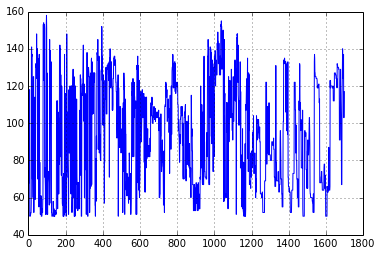

In [19]:
all_present.Min.plot();

In [20]:
# split into training and validation
data = all_present[features].values
labels = all_present['NSP'].values[:,np.newaxis]

train_data, valid_data, train_labels, valid_labels  = train_test_split(data, labels, test_size=0.2)

In [21]:
print train_data.shape
print valid_data.shape

(1359, 21)
(340, 21)


In [22]:
# should do PCA and/or normalization, but skipping due to time


# Binary tree

In [23]:
# basic decision tree
bin_tree = tree.DecisionTreeClassifier()
bin_tree_fit = bin_tree.fit(train_data, train_labels)

train_pred = bin_tree_fit.predict(train_data)
valid_pred = bin_tree_fit.predict(valid_data)

In [24]:
# performance on training set
print bin_tree_fit.score(train_data, train_labels)
# performance on validation set
print bin_tree_fit.score(valid_data, valid_labels)

0.999264164827
0.929411764706


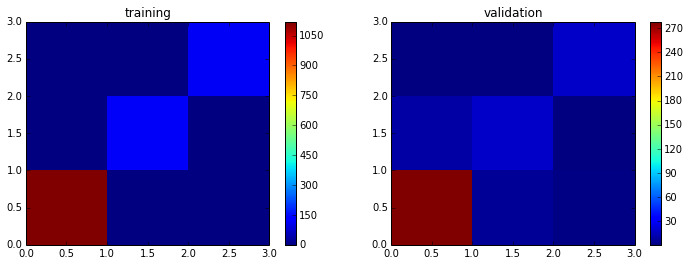

In [25]:
plt.figure(figsize=[12,4]);
plt.subplot(121);
plt.pcolor(confusion_matrix(train_labels, train_pred));
plt.colorbar();
plt.title('training');
plt.subplot(122);
plt.pcolor(confusion_matrix(valid_labels, valid_pred));
plt.colorbar();
plt.title('validation');

# Random forest

In [26]:
rf = RandomForestClassifier()

In [27]:
rf.fit(train_data, train_labels.ravel())

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0)

In [28]:
train_pred = rf.predict(train_data)
print train_pred.shape

(1359,)


In [29]:
valid_pred = rf.predict(valid_data)
print valid_pred.shape

(340,)


In [30]:
print rf.score(train_data, train_labels)
print rf.score(valid_data, valid_labels)

0.99484915379
0.95


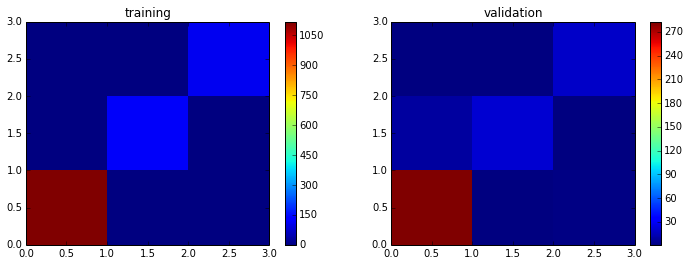

In [31]:
plt.figure(figsize=[12,4]);
plt.subplot(121);
plt.pcolor(confusion_matrix(train_labels, train_pred));
plt.colorbar();
plt.title('training');
plt.subplot(122);
plt.pcolor(confusion_matrix(valid_labels, valid_pred));
plt.colorbar();
plt.title('validation');

In [32]:
# measure on test set
testing = pd.read_csv('Insight_Test_DC.csv')

print "missing elements: " + str(testing.isnull().sum().sum())

test_data = testing[features].values
test_labels = testing['NSP'].values[:,np.newaxis]


missing elements: 0


In [33]:
test_pred = rf.predict(test_data)

In [34]:
print rf.score(test_data, test_labels)

0.84074941452


# Gradient boosting 

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=1000)

In [37]:
gb.fit(train_data, train_labels.ravel())

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, min_samples_leaf=1,
              min_samples_split=2, n_estimators=1000, random_state=None,
              subsample=1.0, verbose=0)

In [40]:
print gb.score(train_data, train_labels)
print gb.score(valid_data, valid_labels)
print gb.score(test_data, test_labels)

0.999264164827
0.958823529412
0.892271662763


In [41]:
train_pred = gb.predict(train_data)
valid_pred = gb.predict(valid_data)
test_pred = gb.predict(test_data)

In [42]:
confusion_matrix(train_labels, train_pred)

array([[1120,    0,    0],
       [   1,  122,    0],
       [   0,    0,  116]])

In [43]:
confusion_matrix(valid_labels, valid_pred)

array([[283,   2,   3],
       [  7,  23,   1],
       [  0,   1,  20]])

In [44]:
confusion_matrix(test_labels, test_pred)

array([[227,  20,   0],
       [ 22, 119,   0],
       [  0,   4,  35]])

In [45]:

print gb.feature_importances_

[ 0.02274484  0.06817983  0.05426195  0.05199285  0.03969514  0.00610862
  0.09087097  0.10922813  0.04036388  0.0977697   0.03485458  0.0334198
  0.04289494  0.02588507  0.02196244  0.02841886  0.04383597  0.04633006
  0.08256125  0.03384059  0.02478051]
